# 🧠 Análise de Vendas – Hype Femme

## 1. 📌 Introdução

A Hype Femme é uma marca fictícia de streetwear feminino, criada para este projeto com o objetivo de simular uma operação de e-commerce moderna e conectada às tendências do mercado. A proposta da marca é oferecer roupas com estilo urbano, atendendo ao público jovem que busca autenticidade e representatividade nas peças que usa.

Este projeto de análise tem como objetivo explorar os dados de vendas da loja durante o ano de 2024, aplicando técnicas de análise de dados com Python e construção de visualizações estratégicas no Power BI. As perguntas norteadoras da análise incluem:

- Quais produtos foram mais vendidos ao longo do ano?
- Qual canal de venda teve o melhor desempenho financeiro?
- Como o ticket médio se comportou?
- Existem sazonalidades ou padrões de comportamento de compra?

Ao final, espera-se extrair insights que apoiem decisões estratégicas para crescimento da marca, reposição de estoque e definição de canais prioritários.


## 2. 📚 Importação de bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

## 3. 📥 Carregamento dos dados

In [5]:
# Carregando o arquivo CSV
df = pd.read_csv("vendas_hypefemme.csv")

## 4. 🔎  Exploração inicial dos dados

In [6]:
df.head()

,id_venda,data_venda,produto,categoria,preco_unitario,quantidade,canal_venda,custo_unitario,cliente_id,estado
0,1,2024-11-23,Cropped Athena,Cropped Oversized,109.9,1,Shopee,48.0,CL5012,RS
1,2,2024-03-12,Óculos Y2K Crystal,Óculos de Sol Y2K,99.9,1,Shopee,40.0,CL9935,RJ
2,3,2024-10-29,Calça Cargo Bold,Calça Cargo,179.9,1,Site,72.0,CL4582,RS
3,4,2024-09-15,Boné Trucker Onyx,Boné Trucker,79.9,1,Instagram,28.0,CL9928,SC
4,5,2024-04-22,Calça Cargo Bold,Calça Cargo,179.9,3,Site,72.0,CL1106,MG


In [7]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_venda        300 non-null    int64  
 1   data_venda      300 non-null    object 
 2   produto         300 non-null    object 
 3   categoria       300 non-null    object 
 4   preco_unitario  300 non-null    float64
 5   quantidade      300 non-null    int64  
 6   canal_venda     300 non-null    object 
 7   custo_unitario  300 non-null    float64
 8   cliente_id      300 non-null    object 
 9   estado          300 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 23.6+ KB


In [8]:
# Verificando valores nulos
df.isnull().sum()

id_venda          0
data_venda        0
produto           0
categoria         0
preco_unitario    0
quantidade        0
canal_venda       0
custo_unitario    0
cliente_id        0
estado            0
dtype: int64

In [9]:
# Estatísticas básicas
df.describe()

,id_venda,preco_unitario,quantidade,custo_unitario
count,300.000000,300.000000,300.000000,300.000000
mean,150.500000,127.200000,1.993333,51.553333
std,86.746758,49.765772,0.825972,22.347076
min,1.000000,79.900000,1.000000,28.000000
25%,75.750000,89.900000,1.000000,35.000000
50%,150.500000,99.900000,2.000000,40.000000
75%,225.250000,179.900000,3.000000,72.000000
max,300.000000,219.900000,3.000000,95.000000


## 5. 🪄 Tratamento dos dados

In [10]:
# Convertendo a coluna de data para formato datetime
df['data_venda'] = pd.to_datetime(df['data_venda'])

# Criando novas colunas úteis
df['mes'] = df['data_venda'].dt.month
df['receita'] = df['preco_unitario'] * df['quantidade']
df['custo_total'] = df['custo_unitario'] * df['quantidade']
df['lucro'] = df['receita'] - df['custo_total']

In [11]:
df.head()

,id_venda,data_venda,produto,categoria,preco_unitario,quantidade,canal_venda,custo_unitario,cliente_id,estado,mes,receita,custo_total,lucro
0,1,2024-11-23,Cropped Athena,Cropped Oversized,109.9,1,Shopee,48.0,CL5012,RS,11,109.9,48.0,61.9
1,2,2024-03-12,Óculos Y2K Crystal,Óculos de Sol Y2K,99.9,1,Shopee,40.0,CL9935,RJ,3,99.9,40.0,59.9
2,3,2024-10-29,Calça Cargo Bold,Calça Cargo,179.9,1,Site,72.0,CL4582,RS,10,179.9,72.0,107.9
3,4,2024-09-15,Boné Trucker Onyx,Boné Trucker,79.9,1,Instagram,28.0,CL9928,SC,9,79.9,28.0,51.9
4,5,2024-04-22,Calça Cargo Bold,Calça Cargo,179.9,3,Site,72.0,CL1106,MG,4,539.7,216.0,323.7


## 6. 📈 Análises e visualizações
- Receita por mês
- Lucro por canal
- Produto mais vendido
- Ticket médio, etc.

### 🎯 Receita por Mês
Vamos analisar como a receita variou ao longo de 2024.

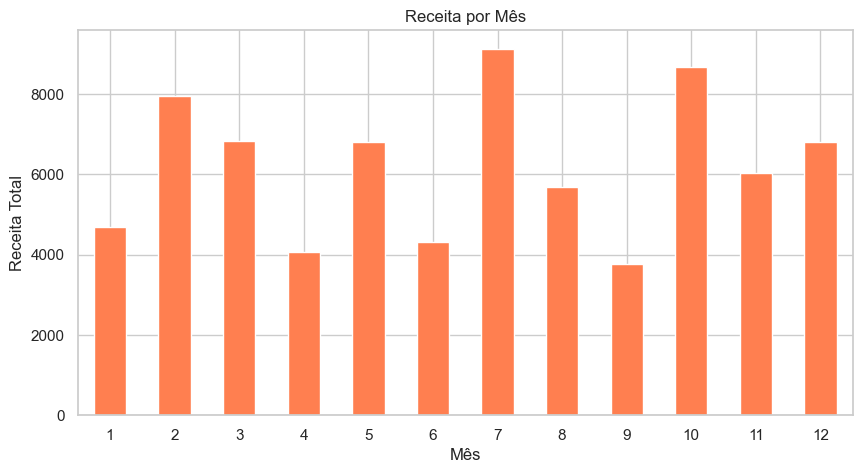

In [12]:
df.groupby('mes')['receita'].sum().plot(kind='bar', color='#FF7F50')
plt.title('Receita por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.xticks(rotation=0)
plt.show()

### 📊 Distribuição de Lucro por Canal de Venda

vamos analisar qual canal de venda gerou mais lucro para a Hype Femme ao longo de 2024.

**Canais considerados:**
- Site
- Instagram
- Shopee
- Mercado Livre


Text(0, 0.5, ' ')

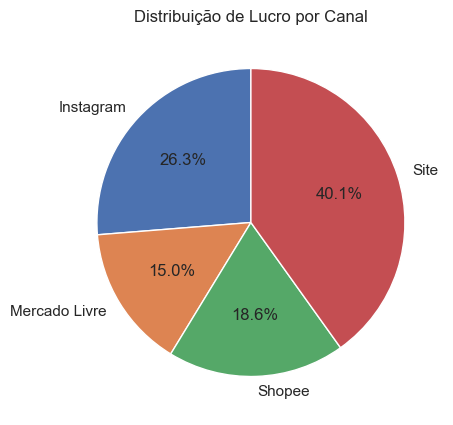

In [13]:
 1 #📌 Lucro por canal
df.groupby('canal_venda')['lucro'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Lucro por Canal')
plt.xlabel('')
plt.ylabel(' ')

### 🛍️ Top Produtos por Quantidade Vendida

Agora vamos visualizar quais foram os produtos mais vendidos em termos de **quantidade**. 

**Métricas observadas:**
- Produto
- Total de unidades vendidas no ano


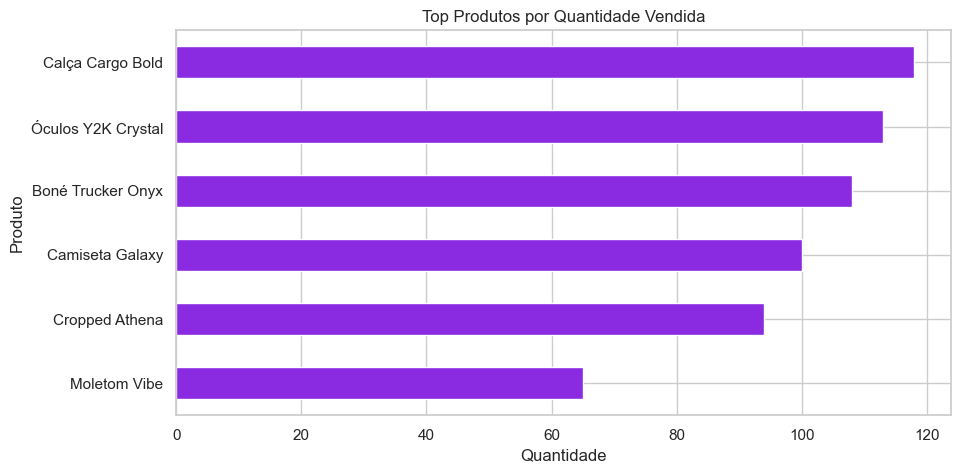

In [14]:
df.groupby('produto')['quantidade'].sum().sort_values().plot(kind='barh', color='#8A2BE2')
plt.title('Top Produtos por Quantidade Vendida')
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.show()

## 💳 Análise do Ticket Médio

O **ticket médio** representa o valor médio gasto por compra, ou seja, é a receita dividida pela quantidade de pedidos.


In [15]:
#📌 Ticket médio
ticket_medio = df['receita'].sum() / df['quantidade'].sum()
print(f"Ticket médio por item: R$ {ticket_medio:.2f}")

Ticket médio por item: R$ 125.02



## 7. 🧠 Insights Estratégicos

- **O canal de vendas com maior lucro foi o Site.**  
  (*Isso indica que campanhas próprias estão mais rentáveis do que marketplaces? Vale a pena aumentar o tráfego para o site?*)

- **O produto mais vendido foi a Calça Cargo Bold.**  
  (*Esse item tem apelo recorrente? É sazonal ou tendência? Deveria se tornar peça permanente no catálogo?*)

- **O ticket médio está na casa de R$125,00.**  
  (*Existe espaço para estratégias de upsell? Clientes costumam comprar mais de um item?*)

- **Meses com maior volume de vendas: Fevereiro, Julho e Outubro.**  
  (*Esses meses coincidem com campanhas sazonais? Deveria haver mais investimentos nessas épocas?*)

## 8. ✅ Conclusão

Com base nos dados de 2024, a Hype Femme apresenta uma performance sólida em seu canal próprio (site), com destaque para peças-chave como a Calça Cargo e produtos com estética Y2K. O ticket médio indica que o público aceita preços intermediários, abrindo espaço para estratégias de kits, brindes por valor ou descontos progressivos.

A sazonalidade nas vendas também sugere oportunidades de reforçar campanhas nos meses de maior volume, com foco em mídia paga, collabs ou lançamentos estratégicos.